> # NLP: Text Classification

***Problem Statement - Classify the description of E-commerce products into 4 categories by implementing any NLP approach for analysis and modeling on the provided dataset. The objective is to recognize whether the given description is related to Electronics (0), Households (1), Books (2), or Clothing & Accessories (3) products. Focus majorly on unique preprocessing techniques.***

By : Lokesh Baviskar

Email Id: Lokesh Baviskar

## ***Approach:***
 - **Exploration of Target Variables.**
 - **Text Mining on Text data**
 - **Word Cloud of different categories**
 - **Text Vectorization using TF-IDF**
 - **Building Multiple ML classification models**
 - **5-Fold Cross Validation on ML model**
 - **Best Model Selection Based on f1 score & Cross validation Score**
 - **Hyperparameter Tuning on Best model**
 - **Saving Best Model**

In [2]:
#Importing warning library to avoid any warnings
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset excel file using pandas.
df=pd.read_csv('ecommerceDataset.csv',header = None) 

In [4]:
df.rename(columns={0: "Product_class", 1:'Product_Description'}, inplace=True)

In [5]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
df.head()

No. of Rows : 50425
No. of Columns : 2


,Product_class,Product_Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [6]:
df.info() #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product_class        50425 non-null  object
 1   Product_Description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


#### Comment:
- **In this Dataset we have Product Description of 50245 of belonging to 4 Different Product Category.**
- **We can see one missing value in Product Description.**

### **Data Integrity Check**

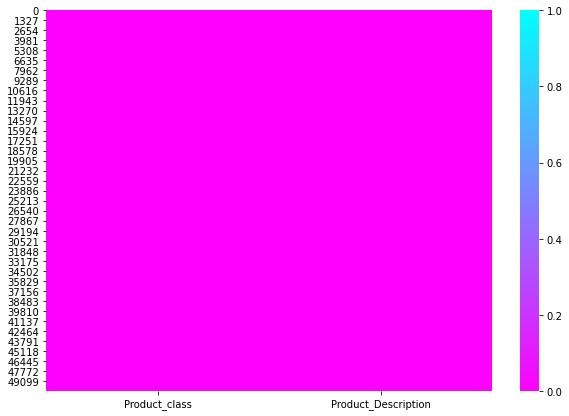

Product_class          0
Product_Description    1
dtype: int64

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()
df.isnull().sum()

 __There is one missing value in product description, We will drop it.__

In [8]:
df = df.dropna()

**No missing values are present**

### **Exploration of Target Variable Ratings**

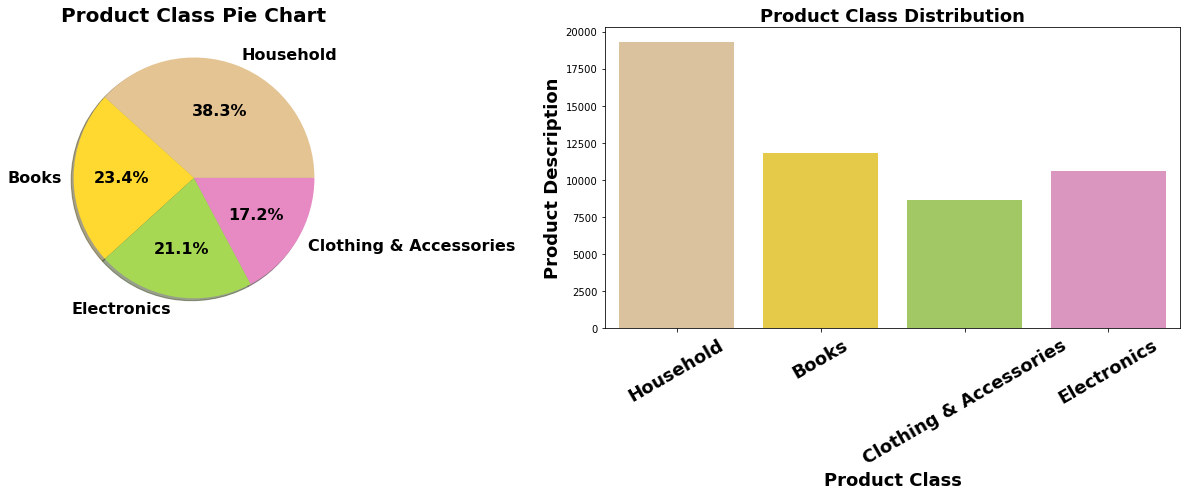

Value Counts of Product Class:


Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: Product_class, dtype: int64

In [10]:
# Pie & Count plot of Ratings
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
f,ax=plt.subplots(1,2,figsize=(18,7))
df['Product_class'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Product Class Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Product_class',data=df,ax=ax[1])
ax[1].set_title('Product Class Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Product Class",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Product Description",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold',rotation = 30)
plt.tight_layout()
plt.show()
print('Value Counts of Product Class:')
df['Product_class'].value_counts()

- **We can see 38.3% of products belong to Household products followed by Books.**

## **Text Mining**

**Operation perform are as followed:**

- **Removing Punctuations and other special characters**

- **Word Tokenization**

- **Coverting text to lower case**

- **Text Preprocessing using regular expression**

- **Removing Stop Words**

- **Stemming and Lemmatising**

- **Applying Text Vectorization**

In [11]:
#Importing required libraries
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

- **Applying Regular expression for text extraction.**

In [12]:
def clean_text(df, df_column_name):
    
    #Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [13]:
#Calling the class
clean_text(df, 'Product_Description')
df['Product_Description'].head(3)

0    paper plane design framed wall hanging motivat...
1    saf floral framed painting wood numbr inch x n...
2    saf uv textured modern art print framed painti...
Name: Product_Description, dtype: object

- **Word Tokenization using RegexpTokenizer✔**

In [14]:
#Tokenizing the data using RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['Product_Description'] = df['Product_Description'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

,Product_class,Product_Description
0,Household,"[paper, plane, design, framed, wall, hanging, ..."
1,Household,"[saf, floral, framed, painting, wood, numbr, i..."
2,Household,"[saf, uv, textured, modern, art, print, framed..."
3,Household,"[saf, flower, print, framed, painting, synthet..."
4,Household,"[incredible, gifts, india, wooden, happy, birt..."


- **Lemmatization** 

In [15]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

In [16]:
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters
import gensim
def lemmatization(text):
    return WordNetLemmatizer().lemmatize(text)

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        result.append(lemmatization(token))    
    return result

In [17]:
#Processing review with above Function
processed_description = []

for doc in df.Product_Description:
    processed_description.append(preprocess(doc))
    
print(len(processed_description))

50424


In [18]:
df['Product_Description']= processed_description  #Assigning this to the dataframe

In [19]:
df['Product_Description'] = df['Product_Description'].apply(lambda x:' '.join(y for y in x))
df.head()

,Product_class,Product_Description
0,Household,paper plane design framed wall hanging motivat...
1,Household,saf floral framed painting wood numbr inch x n...
2,Household,saf uv textured modern art print framed painti...
3,Household,saf flower print framed painting synthetic num...
4,Household,incredible gift india wooden happy birthday un...


#### **Word Cloud**
- **Word Cloud is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency.**
- **The more commonly the term appears within the text being analysed, the larger the word appears in the image generated.**
- **The enlarged texts are the most number of words used there and small texts are the less number of words used.**

In [20]:
import wordcloud

**1. Word Cloud for Household**

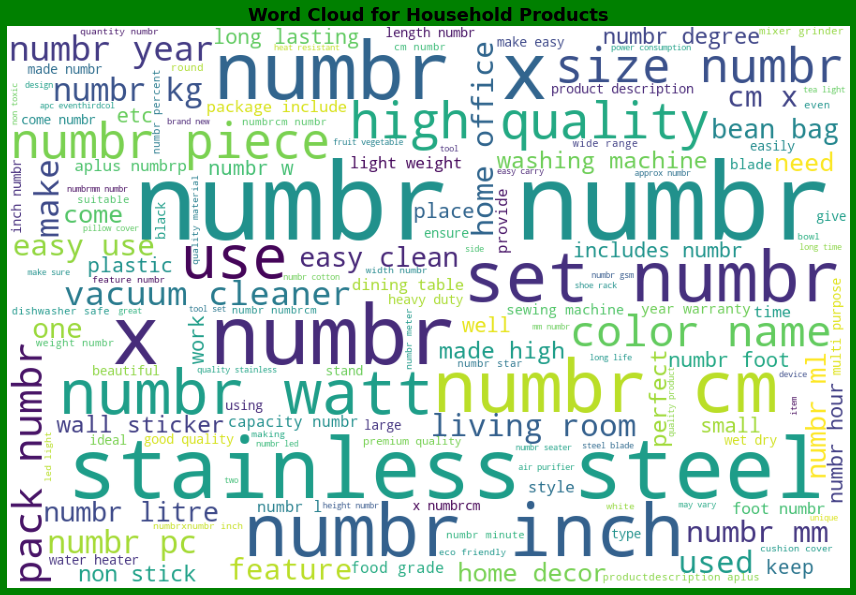

In [21]:
# Word cloud of Household
Household_df = df['Product_Description'][df['Product_class'] == "Household"]
zero_cloud = wordcloud.WordCloud(width = 900, height = 600, background_color = 'white', max_words = 150).generate(' '.join(Household_df))
plt.figure(figsize = (12,9), facecolor = 'g')
plt.imshow(zero_cloud)
plt.axis('off')
plt.title('Word Cloud for Household Products', fontsize= 18, fontweight = 'bold')
plt.tight_layout(pad = 0)
plt.show()

**2. Word Cloud for Books**

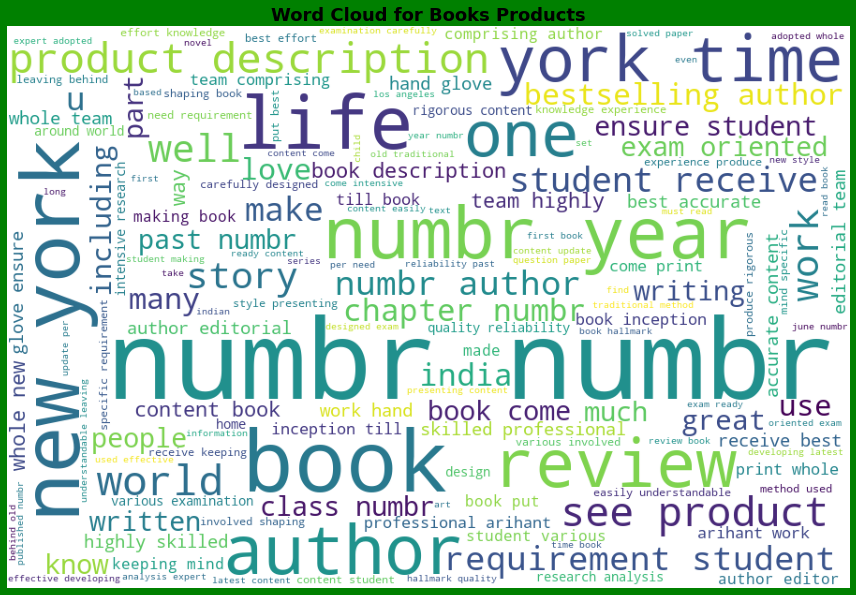

In [22]:
# Word cloud of Books
Books_df = df['Product_Description'][df['Product_class'] == "Books"]
zero_cloud = wordcloud.WordCloud(width = 900, height = 600, background_color = 'white', max_words = 150).generate(' '.join(Books_df))
plt.figure(figsize = (12,9), facecolor = 'g')
plt.imshow(zero_cloud)
plt.axis('off')
plt.title('Word Cloud for Books Products', fontsize= 18, fontweight = 'bold')
plt.tight_layout(pad = 0)
plt.show()

**3. Word Cloud for Electronics**

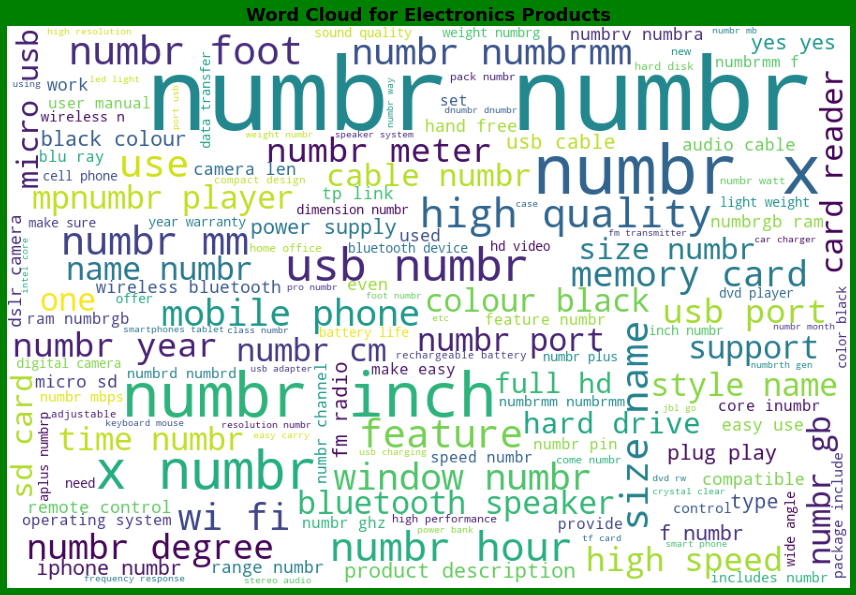

In [23]:
# Word cloud of Electronics
Electronics_df = df['Product_Description'][df['Product_class'] == "Electronics"]
zero_cloud = wordcloud.WordCloud(width = 900, height = 600, background_color = 'white', max_words = 150).generate(' '.join(Electronics_df))
plt.figure(figsize = (12,9), facecolor = 'g')
plt.imshow(zero_cloud)
plt.axis('off')
plt.title('Word Cloud for Electronics Products', fontsize= 18, fontweight = 'bold')
plt.tight_layout(pad = 0)
plt.show()

**4. Word Cloud for Clothing & Accessories**

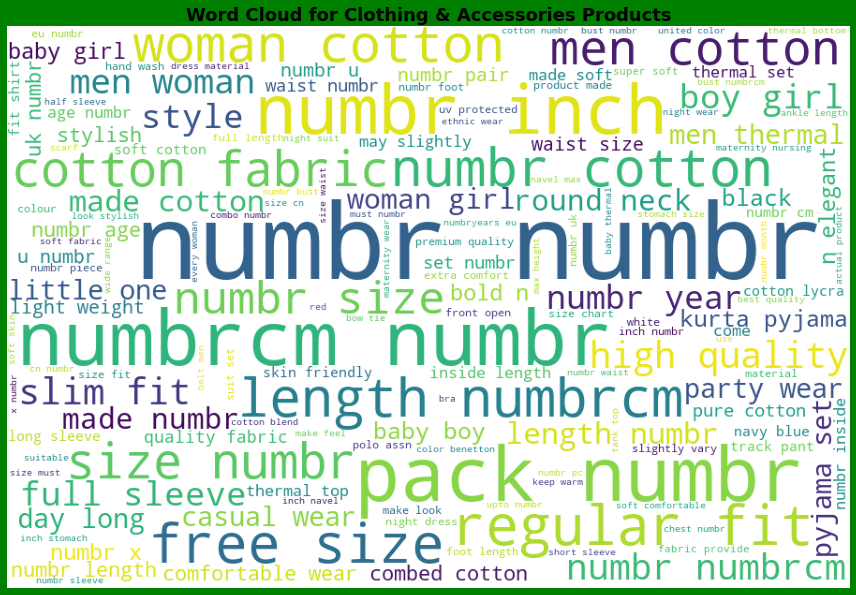

In [24]:
# Word cloud of Clothing & Accessories
Clothing_df = df['Product_Description'][df['Product_class'] == "Clothing & Accessories"]
zero_cloud = wordcloud.WordCloud(width = 900, height = 600, background_color = 'white', max_words = 150).generate(' '.join(Clothing_df))
plt.figure(figsize = (12,9), facecolor = 'g')
plt.imshow(zero_cloud)
plt.axis('off')
plt.title('Word Cloud for Clothing & Accessories Products', fontsize= 18, fontweight = 'bold')
plt.tight_layout(pad = 0)
plt.show()

### **Text Vectorization Using TFIDF**

In [30]:
# Converting text into numeric using TfidfVectorizer
tf = TfidfVectorizer()
features = tf.fit_transform(df['Product_Description'])
X=features

In [31]:
X.shape

(50424, 62859)

### **Label Encoding of Target Variable**

In [32]:
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()

In [33]:
df['Product_class'] = lb_encoder.fit_transform(df['Product_class'])

In [34]:
Y=df[['Product_class']]

In [35]:
Y.shape

(50424, 1)

## **Machine Learning Model Building**

In [36]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (35296, 62859)
Training target vector size: (35296, 1)
Test feature matrix size: (15128, 62859)
Test target vector size: (15128, 1)


#### Finding best Random state

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9699894235854045 on Random_state 61


### **Logistics Regression**

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=61, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9699894235854045


Confusion matrix of Logistics Regression : 
 [[3384   13   28   73]
 [  13 2517   11   28]
 [  53   10 3055  112]
 [  37   23   53 5718]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3498
           1       0.98      0.98      0.98      2569
           2       0.97      0.95      0.96      3230
           3       0.96      0.98      0.97      5831

    accuracy                           0.97     15128
   macro avg       0.97      0.97      0.97     15128
weighted avg       0.97      0.97      0.97     15128



In [38]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.5435 0.5184 0.6062 0.6375 0.5917]
Mean CV Score : 0.57946
Std deviation : 0.04302309147423043


### **Decision Tree Classifier**

In [40]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.9541248016922264


Confusion matrix of Decision Tree Classifier : 
 [[3355    6   31  106]
 [  13 2468    8   80]
 [  36   14 3017  163]
 [  63   49  125 5594]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      3498
           1       0.97      0.96      0.97      2569
           2       0.95      0.93      0.94      3230
           3       0.94      0.96      0.95      5831

    accuracy                           0.95     15128
   macro avg       0.96      0.95      0.96     15128
weighted avg       0.95      0.95      0.95     15128



In [43]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, X, Y, cv =5, scoring='f1_macro')
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.83593951 0.88262235 0.88543474 0.85740263 0.86955266]
Mean CV Score : 0.8661903789196579
Std deviation : 0.018132840080195566


### **Random Forest Classifier**

In [44]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.9707826546800634


Confusion matrix of Random Forest Classifier : 
 [[3397    7   13   81]
 [  10 2514    6   39]
 [  27   11 3036  156]
 [  33   17   42 5739]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      3498
           1       0.99      0.98      0.98      2569
           2       0.98      0.94      0.96      3230
           3       0.95      0.98      0.97      5831

    accuracy                           0.97     15128
   macro avg       0.98      0.97      0.97     15128
weighted avg       0.97      0.97      0.97     15128



In [46]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, X, Y, cv =5, scoring='f1_macro')
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.91696271 0.92232197 0.92914893 0.89852386 0.93315436]
Mean CV Score : 0.9200223674604089
Std deviation : 0.01210436898806324


***Based on f1 score and cross validation score we are selecting Random forest classifier as best models.*** 

***Now we are gone perform hyper parameter tuning on this model.***

## **Hyper Parameter Tuning : GridSearchCV**

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
print(rfc.get_paramsrams())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [58]:
parameter = { 'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              }

In [59]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START criterion=gini..............................................
[CV 1/5; 1/2] END ...............criterion=gini;, score=0.969 total time= 2.5min
[CV 2/5; 1/2] START criterion=gini..............................................
[CV 2/5; 1/2] END ...............criterion=gini;, score=0.965 total time= 2.4min
[CV 3/5; 1/2] START criterion=gini..............................................
[CV 3/5; 1/2] END ...............criterion=gini;, score=0.968 total time= 2.3min
[CV 4/5; 1/2] START criterion=gini..............................................
[CV 4/5; 1/2] END ...............criterion=gini;, score=0.960 total time= 2.3min
[CV 5/5; 1/2] START criterion=gini..............................................
[CV 5/5; 1/2] END ...............criterion=gini;, score=0.962 total time= 2.3min
[CV 1/5; 2/2] START criterion=entropy...........................................
[CV 1/5; 2/2] END ............criterion=entropy;,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, verbose=10)

In [60]:
GCV.best_params_

{'criterion': 'gini'}

## **Final Model**

In [61]:
Final_mod = RandomForestClassifier(criterion='gini')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Final Random Forest Classifier Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Final Random Forest Classifier Model
Accuracy Score :
 0.9701877313590693


Confusion matrix of Random Forest Classifier : 
 [[3396    9   16   77]
 [  14 2502    6   47]
 [  26   10 3040  154]
 [  43   12   37 5739]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      3498
           1       0.99      0.97      0.98      2569
           2       0.98      0.94      0.96      3230
           3       0.95      0.98      0.97      5831

    accuracy                           0.97     15128
   macro avg       0.97      0.97      0.97     15128
weighted avg       0.97      0.97      0.97     15128



## Saving model

In [65]:
import joblib
joblib.dump(Final_mod,'Ecomm_Prediction.pkl')

['Ecomm_Prediction.pkl']